# Matplotlib raport - Diamonds
Maciej Śliwakowski

Źródła:
- McKinney W. (2018). *Python w analizie danych. Przetwarzanie danych za pomocą pakietów Pandas i NumPy oraz środowiska IPython.* Wydanie II. Helion
- Grus J. (2018). Data science od podstaw. Analiza danych w Pythonie. Helion
- dokumentacja matplotlib (https://matplotlib.org/3.3.0/index.html)
- dokumentacja seaborn (https://seaborn.pydata.org/)

Użyte biblioteki:

In [1]:
# Matplotlib, seaborn, pandas, numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Typy wykresów i zaawansowane wizualizacje

<div style="text-align: justify">Celem przedstawienia typów wykresów bardziej zaawansowanych wizualizacji użytecznych przy analizie danych lub stosowaniu algorytmów uczenia maszynowego, posłużę się zestawem danych <b>Diamonds</b>. Wykorzystany zestaw danych nie posłuży jako obiekt właściwej analizy wykonanej w ramach pracy magisterskiej, lecz jako poręczne narzędzie do ukazania możliwości pakietu <b>Matplotlib</b> w ramach tego raportu.</div>
<br></br>

Źródło i opis danych: <a href=https://www.kaggle.com/shivam2503/diamonds>https://www.kaggle.com/shivam2503/diamonds</a>

Opis zmiennych:
- **carat**: waga diamentu w karatach
- **cut**: jakość szlifu diamentu (Fair, Good, Very Good, Premium, Ideal)
- **color**: jakość koloru diamentu (J - najgorsza, D - najlepsza)
- **clarity**: miara tego, jak czysty jest diament (I1 - najgorszy, SI2, SI1, VS2, VS1, VVS2, VVS1, IF - najlepszy)
- **depth**: procentowa miara głębi diamentu
- **table**: proporcja szerokości najwyższej płaszczyzny diamentu(table) do szerokości jego najszerszej płaszczyzny
- **price**: cena diamentu w dolarach amerykańskich
- **x**: długość w mm
- **y**: szerokość w mm
- **z**: głębokość w mm

#### Wczytanie i wyświetlenie "surowych" danych

In [5]:
rawdata = sns.load_dataset('diamonds')

In [6]:
rawdata

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Wizualizacja wartości pustych

<div style="text-align: justify">Po rozpoczęciu procesu analizy danych, można wykorzystać pakiet <b>Matplotlib</b> do wizualizacji tzw. wartości pustych (NULL) w zestawie danych. Uczynię to na dwa sposoby: przy użyciu wyłącznie narzędzi Matplotlib i funkcji <b>matplotlib.pyplot.imshow</b>, służącej do wyświetlania danych jako obrazu, a także przy pomocy funkcji rysowania mapy termicznej (bądź <i>mapy ciepła</i>) z pomocniczego pakietu Seaborn: <b>seaborn.heatmap</b>.</div>

In [7]:
# Sprawdzam, w których kolumnach i w jakiej liczbie występując wartośći puste
rawdata.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
def show_nulls(data, ylabel='index', color='Oranges'):
    "Funkcja wizualizująca wartości puste w zbiorze danych"
    
    # Użycie wbudowanego stylu wykresu:
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(16*.7, 9*.7))
    
    ax.imshow(data.isnull(),
              aspect=len(data.columns)/len(data),
              cmap=color,
              interpolation='none')
    # aspect - format obrazu (aspect ratio)
    # cmap - ustawienie wbudowanej mapy kolorów
    # interpolation - ustawienie / wyłączenie interpolacji
    
    ax.set_ylabel(str(ylabel), fontsize=12)
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_xticklabels(data.columns, rotation=90)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(axis='both', linestyle='--')
    
    # Etykieta każdej kolumny zawierającej wartości puste zostanie pogrubiona
    for index in range(len(list(ax.get_xticklabels()))):
        if data.isnull().sum()[index] != 0:
            ax.get_xticklabels()[index].set_fontweight("bold")

    plt.show()
    # Przywrócenie stylu do domyślnego:
    plt.style.use('default')

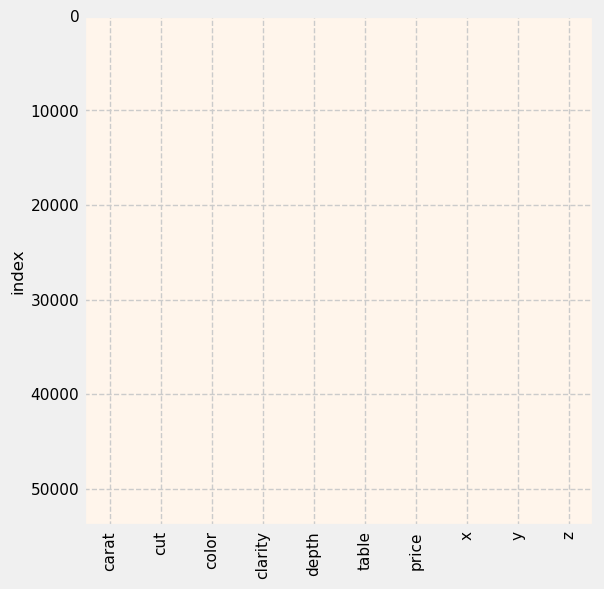

In [11]:
show_nulls(rawdata)